In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

## split into training and testing data 

In [2]:
df   = pd.read_csv('output_LR.csv', low_memory=False)

In [3]:
df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,OccuredAt,Status,Career Length
0,COOLEMORE COUNT,YVRYL,9.770000e+14,12/02/2022,B,738491,EUT,738713,0.0,222
1,SPOOK MAGOO,UNBET,9.720000e+14,10/10/2018,D,737170,EUT,738713,0.0,1543
2,PECKIES DAFFY,VYRAJ,9.720000e+14,07/05/2021,B,737510,EUT,738713,0.0,1203
3,SPOOK MAGOO,UNBET,9.720000e+14,10/10/2018,D,737170,RET,738713,1.0,1543
4,SHELONE KING,UUKTL,9.720000e+14,15/04/2019,D,737164,EUT,738713,0.0,1549
...,...,...,...,...,...,...,...,...,...,...
224185,KIWI SANDY,UTRBS,9.720000e+14,12/09/2019,B,737358,EUT,738064,0.0,706
224186,COUGARS HERO,USQIE,9.720000e+14,18/02/2020,D,737069,EUT,738064,0.0,995
224187,CLASSIC SYLVIA,UBDZZ,9.720000e+14,15/04/2021,B,737128,DIE,738064,3.0,936
224188,VIEW HERMOINE,UPVXM,9.720000e+14,04/10/2019,B,737399,EUT,738064,0.0,665


In [4]:
# Define the proportion of data for training (e.g., 80%)
train_proportion = 0.8

In [5]:
# Calculate the number of rows for training and testing
num_rows = len(df)
num_train = int(num_rows * train_proportion)
num_test = num_rows - num_train

In [6]:
# Randomly sample rows for training
train_indices = df.sample(n=num_train, random_state=42).index
train_df = df.loc[train_indices]

In [7]:
# Use the remaining rows for testing
test_df = df.drop(train_indices)

In [8]:
# Write training and testing DataFrames to CSV files
train_df.to_csv('training1_data.csv', index=False)
test_df.to_csv('testing1_data.csv', index=False)

In [9]:
training_data= pd.read_csv('training1_data.csv', low_memory=False)

In [10]:
training_data.shape

(179352, 10)

In [11]:
training_data["Status"].unique()

array([1., 0., 3.])

In [12]:
training_data["Status"]

0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
179347    1.0
179348    1.0
179349    1.0
179350    1.0
179351    1.0
Name: Status, Length: 179352, dtype: float64

In [13]:
# Convert "Status" column to float and encode categorical labels
#training_data["Status"] = training_data["Status"].map({"EUT": 0, "RAC": 1,"DIE":2,"REG":3,"RET":4,"NEW":5}).astype(float)


In [14]:
training_data.head()

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,OccuredAt,Status,Career Length
0,GLENVIEW PAT,VTIZD,9.770000e+14,01/08/2020,D,737432,DIE,738456,1.0,1024
1,HATFIELD LOLA,VDVHD,9.770000e+14,06/06/2019,B,737530,EUT,738318,0.0,788
2,TALLMAN,XPDTH,9.770000e+14,05/02/2021,D,737688,DIE,738193,1.0,505
3,OVERROUND HOUND,VLMME,9.770000e+14,05/02/2021,D,737769,RET,738231,1.0,462
4,COME ON DAISY,VHUJB,9.770000e+14,25/11/2021,B,737685,DIE,738202,1.0,517


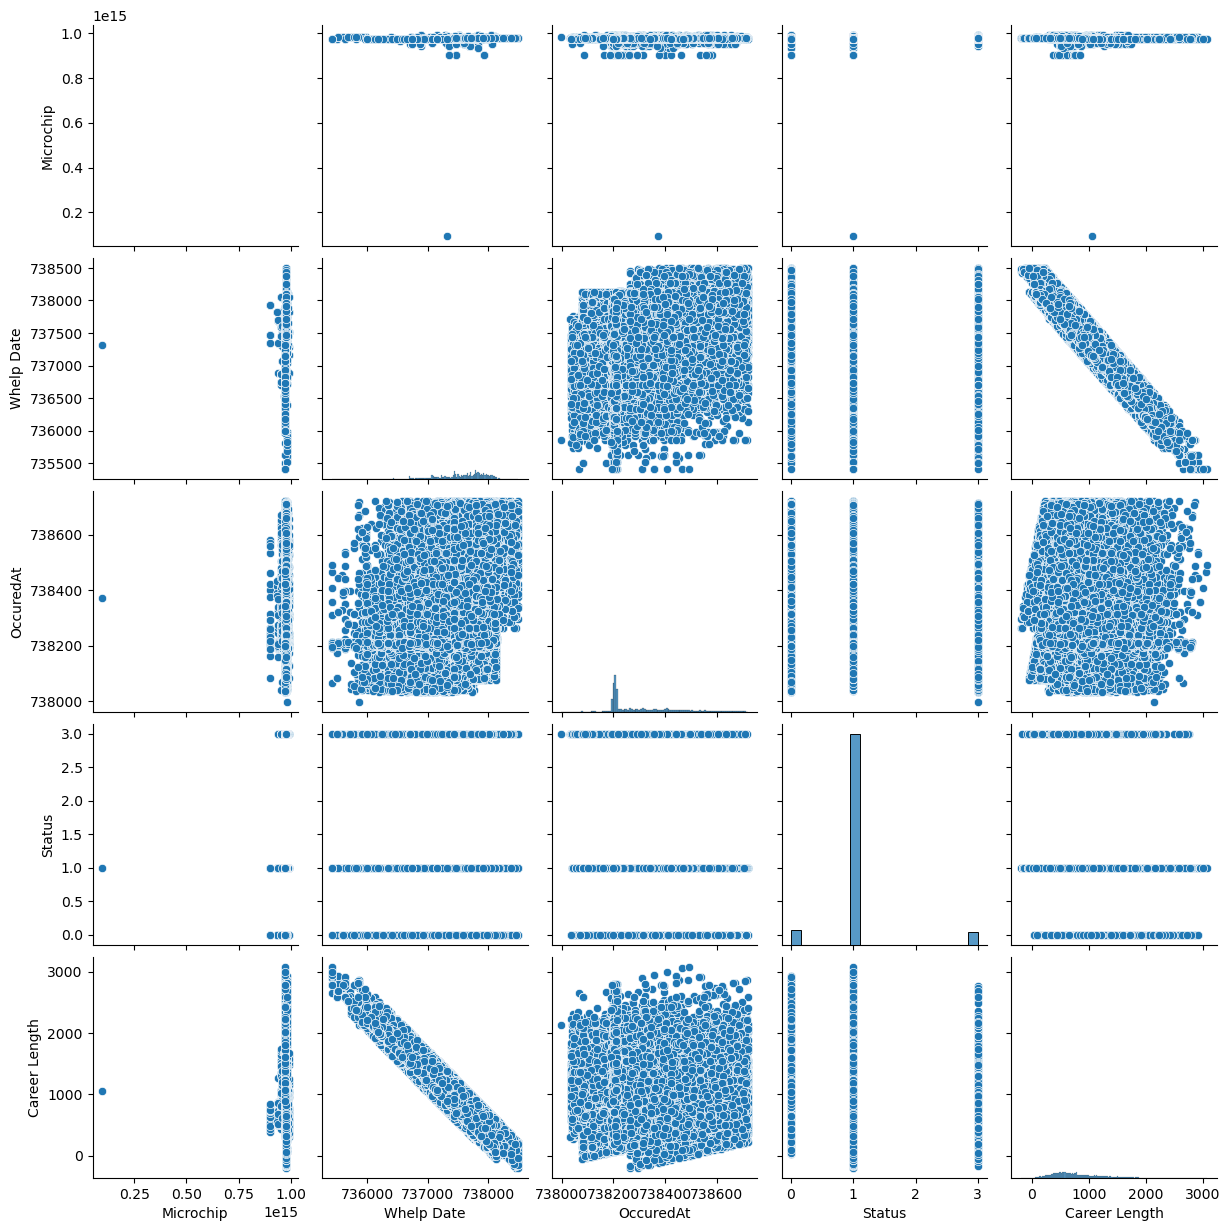

In [15]:
#this data should corrolated.
sns.pairplot(training_data)

In [16]:
training_data = training_data.iloc[:,8].values

In [17]:
training_data

array([1., 0., 1., ..., 1., 1., 1.])

In [18]:
type(training_data)

numpy.ndarray

In [19]:
min(training_data)
max(training_data)

3.0

In [20]:
# scale the data , with a min max scaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
training_data.shape

(179352,)

In [23]:
#the data is now only 1 dimissional data , needs to be 2 dimissional data
#reshape the data
training_data = scaler.fit_transform(training_data.reshape(-1,1))

In [24]:
training_data.shape

(179352, 1)

In [25]:
training_data

array([[0.33333333],
       [0.        ],
       [0.33333333],
       ...,
       [0.33333333],
       [0.33333333],
       [0.33333333]])

In [26]:
#create 2 list, taking 40 days data to predict 1 day.
x_training_data = [] # 40 days
y_training_data = [] # 1 days

In [27]:
for i in range(40,len(training_data)):
    x_training_data.append(training_data[i-40:i,0])
    y_training_data.append(training_data[i,0])

In [28]:
#currently x_training and y_training are a list and need to be a numpy array
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [29]:
# the last step is to reshape our x_training_data(independant variable) into 3 dimensional and the 
# y_training_data(dependant variable) into 2 dimensional
x_training_data = np.reshape(x_training_data,(x_training_data.shape[0],
                             x_training_data.shape[1],
                              1))

In [30]:
#tensors requires 3 dimensions
x_training_data.shape

(179312, 40, 1)

Part2 Tensorflow

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [32]:
#build Recurrent Neural Network(RNN)
rnn = Sequential()

In [33]:
#layer 1
rnn.add(LSTM(units=45,return_sequences=True,input_shape=(x_training_data.shape[1],1)))
#to help overfitting drop rate of 20%
rnn.add(Dropout(0.2))

In [34]:
#layer 2
rnn.add(LSTM(units=45,return_sequences=True))
#to help overfitting drop rate of 20%
rnn.add(Dropout(0.2))

In [35]:
#Layer 3
rnn.add(LSTM(units=45))
#to help overfitting drop rate of 20%
rnn.add(Dropout(0.2))

In [36]:
#output layer
rnn.add(Dense(units=1))

In [37]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#frame this
rnn.fit(x_training_data,y_training_data, epochs=10, batch_size=32)

Epoch 1/10
5604/5604 [==============================] - 318s 55ms/step - loss: 0.0316
Epoch 2/10
5604/5604 [==============================] - 301s 54ms/step - loss: 0.0311
Epoch 3/10
5604/5604 [==============================] - 305s 54ms/step - loss: 0.0310
Epoch 4/10
5604/5604 [==============================] - 303s 54ms/step - loss: 0.0310
Epoch 5/10
5604/5604 [==============================] - 303s 54ms/step - loss: 0.0310
Epoch 6/10
5604/5604 [==============================] - 303s 54ms/step - loss: 0.0310
Epoch 7/10
5604/5604 [==============================] - 305s 54ms/step - loss: 0.0310
Epoch 8/10
5604/5604 [==============================] - 302s 54ms/step - loss: 0.0310
Epoch 9/10
5604/5604 [==============================] - 303s 54ms/step - loss: 0.0310
Epoch 10/10
5309/5604 [===========================>..] - ETA: 16s - loss: 0.0309

### Part 3 make predictions

(46751,)


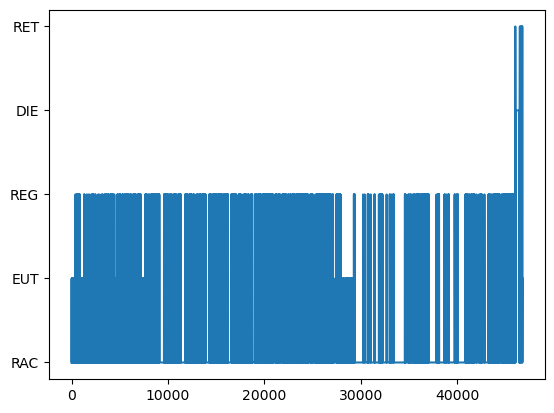

In [51]:
#Import the test data set and transform it into a NumPy array
test_data = pd.read_csv('testing1_data.csv')
test_data = test_data.iloc[:,8].values
#Make sure the test data's shape makes sense
print(test_data.shape)
#Plot the test data
plt.plot(test_data)

In [ ]:
#Create unscaled training data and test data objects
unscaled_training_data = pd.read_csv('training_data.csv')
unscaled_test_data = pd.read_csv('testing_data.csv')
# Convert "Status" column to float and encode categorical labels

In [60]:
unscaled_training_data["Status"] = unscaled_training_data["Status"].map({"EUT": 0, "RAC": 1,"DIE":2,"REG":3,"RET":4,"NEW":5}).astype(float)

unscaled_test_data["Status"] = unscaled_test_data["Status"].map({"EUT": 0, "RAC": 1,"DIE":2,"REG":3,"RET":4,"NEW":5}).astype(float)


In [61]:
all_data=pd.concat((unscaled_training_data['Status'],
unscaled_test_data['Status']), axis = 0)

In [62]:
#Create our x_test_data object, which has each January day + the 40 prior days
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values
x_test_data = np.reshape(x_test_data, (-1, 1))

In [63]:
x_test_data

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [64]:
#Scale the test data
x_test_data = scaler.transform(x_test_data)

In [65]:
#Grouping our test data
final_x_test_data = []
for i in range(40, len(x_test_data)):
    final_x_test_data.append(x_test_data[i-40:i, 0])
final_x_test_data = np.array(final_x_test_data) 

In [66]:
#Reshaping the NumPy array to meet TensorFlow standards
final_x_test_data=np.reshape(final_x_test_data,
(final_x_test_data.shape[0], final_x_test_data.shape[1], 1))

In [67]:
#Generating our predicted values
predictions = rnn.predict(final_x_test_data)

1461/1461 [==============================] - 29s 19ms/step


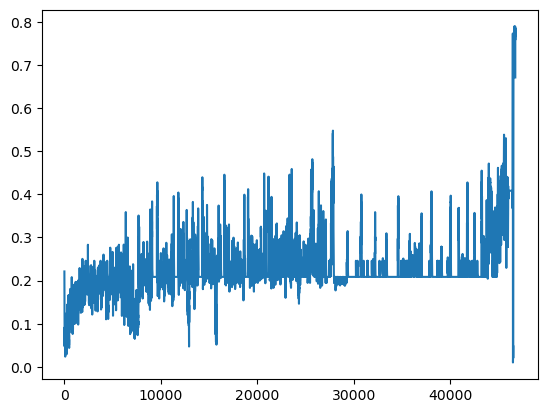

In [68]:
#Plotting our predicted values
plt.clf() #This clears the old plot from our canvas
plt.plot(predictions)

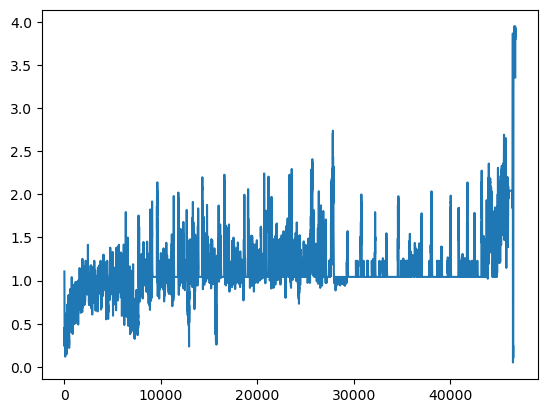

In [69]:
#Unscaling the predicted values and re-plotting the data
unscaled_predictions = scaler.inverse_transform(predictions)
plt.plot(unscaled_predictions) 

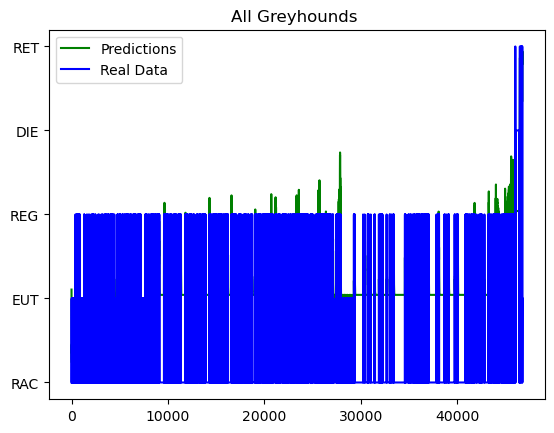

In [72]:
#Plotting the predicted values against Facebook's actual stock price
plt.plot(unscaled_predictions, color = 'Green', label = "Predictions")
plt.plot(test_data, color = 'blue', label = "Real Data")
plt.title('All Greyhounds ')
plt.legend()

Accuracy

Measuring the accuracy of a Recurrent Neural Network (RNN) typically depends on the specific task you're using the RNN for. Here are some common ways to measure the accuracy of an RNN for different tasks:

In [38]:
from sklearn.metrics import accuracy_score

# Assuming y_true is the true labels and y_pred is the predicted labels
accuracy = accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined

Measuring the accuracy of a Recurrent Neural Network (RNN) typically depends on the specific task you're using the RNN for. Here are some common ways to measure the accuracy of an RNN for different tasks:

Sequence Classification (e.g., Sentiment Analysis):

For tasks where you're classifying sequences, such as sentiment analysis, you can measure accuracy using standard classification metrics:
python
Copy code
from sklearn.metrics import accuracy_score

Assuming y_true is the true labels and y_pred is the predicted labels
accuracy = accuracy_score(y_true, y_pred)
Time Series Prediction:

If your RNN is used for time series prediction (e.g., stock price forecasting), you can use metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE) to measure the accuracy of your predictions.
python

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_true is the true values and y_pred is the predicted values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

NameError: name 'y_true' is not defined

Text Generation:

For text generation tasks (e.g., language modeling), you can use metrics like Perplexity, which measures how well the model predicts the next word in a sequence. Lower perplexity indicates better performance.

In [40]:
perplexity = calculate_perplexity(y_true, y_pred)

NameError: name 'calculate_perplexity' is not defined